In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

import warnings
warnings.filterwarnings("ignore")

def find_clumsy_directories(root='.'):
    res = []
    for dirpath, dirnames, filenames in os.walk(root):
        for dirname in dirnames:
            if 'clumsy' in dirname.lower():
                res.append(os.path.join(dirpath, dirname))
    return res

headers = re.findall('\s+\w+', """ bytes    packets errs drop fifo frame compressed multicast  bytes    packets errs drop fifo colls carrier compressed""")
headers = [x.strip() for x in headers]
for i in range(len(headers)):
    if i < 8:
        headers[i] = "received-" + headers[i]
    else:
        headers[i] = "sent-" + headers[i]
# print(headers)

def process_line(line):
    d = {}
    if line.split(':')[0].strip() == 'wlan0':
        d['interface'] = 'wlan0'
    elif line.split(':')[0].strip() == 'p2p-wlan0-0':
        d['interface'] = 'p2p-wlan0-0'
    else:
        return None
    line = line.split(':')[1]
    res = re.findall('\s+\w+', line)
    res = [x.strip() for x in res]
    d.update({_[0] : int(_[1]) for _ in zip(headers, res)})

    return pd.DataFrame(d, index=[0])


def create_dataframe(file_path):
    df = pd.DataFrame()
    for line in open(file_path, 'r', encoding='utf-16'):
        new_d = process_line(line)
        if new_d is not None:
            df = df.append(new_d)

#     df.index.name = 'timestamp'
#     df = df.reset_index()
    print(file_path.split('\\'))
    
    df['altered_bandwidth'] = file_path.split('\\')[1].split('-')[1] == 'bandwidth'
    df['altered_dropchance'] = file_path.split('\\')[1].split('-')[1] == 'dropchance'
    df['bandwidth'] = int(file_path.split('\\')[1].split('-')[2][:-4]) if file_path.split('\\')[1].split('-')[1] == 'bandwidth' else 999999
    df['dropchance'] = float(file_path.split('\\')[1].split('-')[2]) if file_path.split('\\')[1].split('-')[1] == 'dropchance' else 0
    df['device'] = file_path.split('\\')[2]
    df['app'] = file_path.split('\\')[3].strip('-W')
    df['app_details'] = file_path.split('\\')[4]
    df['is_record'] = 'record' in file_path.split('\\')[5]
    df['is_wireless'] = '-W' in file_path.split('\\')[3]
    df['repetition'] = file_path.split('\\')[5].strip('record') if 'record' in file_path.split('\\')[5] else file_path.split('\\')[5].strip('replay')
#     print(df)
    # Why is this df empty???
    
    df.to_csv(f'.\\{file_path.strip(".log")}.csv', index=False)

    return df
                

clumsy_dirs = find_clumsy_directories()

df_aggregated = pd.DataFrame()

for clumsy in clumsy_dirs:
    for root, dirs, files in os.walk(clumsy, topdown=False):
        for name in files:
            if name == 'net_dev.log':
                print(os.path.join(root, name))
                df_aggregated = pd.concat([df_aggregated, create_dataframe(os.path.join(root, name))]) 
                
print(df_aggregated)
df = df_aggregated

.\clumsy-bandwidth-100Mbps\Quest-2\BeatSaber\PopStars-Medium\record1\net_dev.log
['.', 'clumsy-bandwidth-100Mbps', 'Quest-2', 'BeatSaber', 'PopStars-Medium', 'record1', 'net_dev.log']
.\clumsy-bandwidth-100Mbps\Quest-2\BeatSaber\PopStars-Medium\replay1.0\net_dev.log
['.', 'clumsy-bandwidth-100Mbps', 'Quest-2', 'BeatSaber', 'PopStars-Medium', 'replay1.0', 'net_dev.log']
.\clumsy-bandwidth-100Mbps\Quest-2\BeatSaber\PopStars-Medium\replay1.1\net_dev.log
['.', 'clumsy-bandwidth-100Mbps', 'Quest-2', 'BeatSaber', 'PopStars-Medium', 'replay1.1', 'net_dev.log']
.\clumsy-bandwidth-100Mbps\Quest-2\BeatSaber\PopStars-Medium\replay1.2\net_dev.log
['.', 'clumsy-bandwidth-100Mbps', 'Quest-2', 'BeatSaber', 'PopStars-Medium', 'replay1.2', 'net_dev.log']
.\clumsy-bandwidth-100Mbps\Quest-Pro\BeatSaber\PopStars-Medium\record1\net_dev.log
['.', 'clumsy-bandwidth-100Mbps', 'Quest-Pro', 'BeatSaber', 'PopStars-Medium', 'record1', 'net_dev.log']
.\clumsy-bandwidth-100Mbps\Quest-Pro\BeatSaber\PopStars-Medium\r

['.', 'clumsy-dropchance-0.01', 'Quest-Pro', 'BeatSaber', 'PopStars-Medium', 'record1', 'net_dev.log']
.\clumsy-dropchance-0.01\Quest-Pro\BeatSaber\PopStars-Medium\replay1.0\net_dev.log
['.', 'clumsy-dropchance-0.01', 'Quest-Pro', 'BeatSaber', 'PopStars-Medium', 'replay1.0', 'net_dev.log']
.\clumsy-dropchance-0.01\Quest-Pro\BeatSaber\PopStars-Medium\replay1.1\net_dev.log
['.', 'clumsy-dropchance-0.01', 'Quest-Pro', 'BeatSaber', 'PopStars-Medium', 'replay1.1', 'net_dev.log']
.\clumsy-dropchance-0.01\Quest-Pro\BeatSaber\PopStars-Medium\replay1.2\net_dev.log
['.', 'clumsy-dropchance-0.01', 'Quest-Pro', 'BeatSaber', 'PopStars-Medium', 'replay1.2', 'net_dev.log']
.\clumsy-dropchance-0.025\Quest-2\BeatSaber\PopStars-Medium\record1\net_dev.log
['.', 'clumsy-dropchance-0.025', 'Quest-2', 'BeatSaber', 'PopStars-Medium', 'record1', 'net_dev.log']
.\clumsy-dropchance-0.025\Quest-2\BeatSaber\PopStars-Medium\replay1.0\net_dev.log
['.', 'clumsy-dropchance-0.025', 'Quest-2', 'BeatSaber', 'PopStars-Me

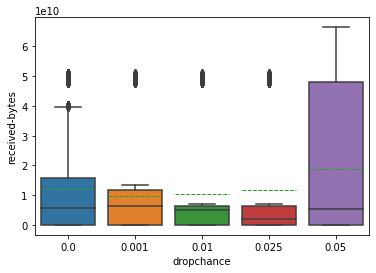

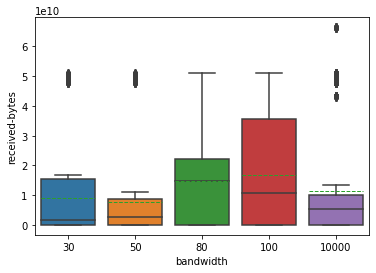

In [16]:
sns.boxplot(data=df, x='dropchance', y='received-bytes', showmeans=True, meanline=True)
plt.show()

sns.boxplot(data=df, x='bandwidth', y='received-bytes', showmeans=True, meanline=True)
plt.show()